In [ ]:
library(ArchR)
library(dplyr)
library(tidyr)
library(GenomicRanges)
library(tidyr)
library(ggplot2)
library(pheatmap)

SEED <- 123
set.seed(SEED)
#functions scripts
source_all_r_files <- function(path_list){
    origin_wd = getwd()
    lapply(
        path_list, function(x) {
            setwd(x)
            file.sources = list.files(pattern =  "*.r$")
            sapply(file.sources,source,.GlobalEnv)
        }
    )
    setwd(origin_wd)
}
source_all_r_files(#CHANGE TO YOUR FUNCTION DIRECTORY)

# import data

In [2]:
# sce 
sce <- readRDS(#change)

## load intermediary

In [3]:
format_output <- readRDS(#change)
overall_predictions  <- readRDS(#change)
sample_predictions <- readRDS(#change)                       

# Top genes plot 

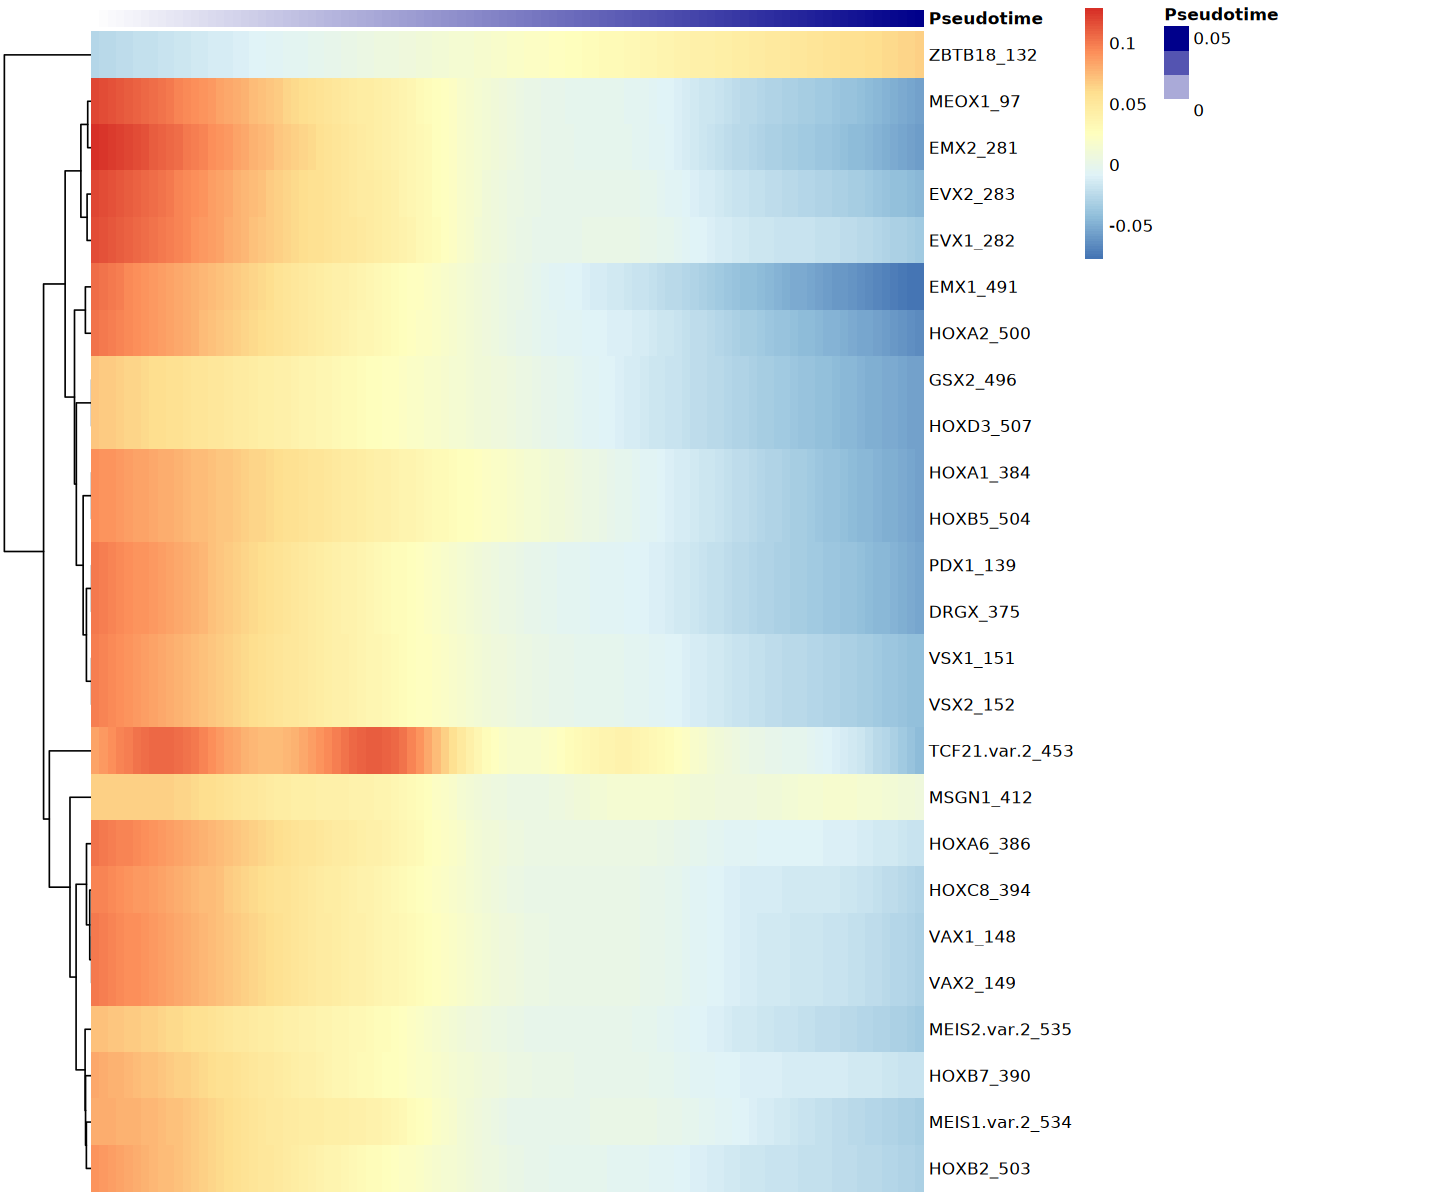

In [5]:
options(repr.plot.width=12, repr.plot.height=10)
plotHeatmapTopMotifs(overall_predictions, format_output, number_genes = 25, ranking_metric = "Range_of_Change")

## enrich for increasing motifs

In [5]:
superior_list = lapply(overall_predictions, function(df) {
    return(mean(df[1:10,"Predicted_Expression"])<mean(df[90:100,"Predicted_Expression"]))
})

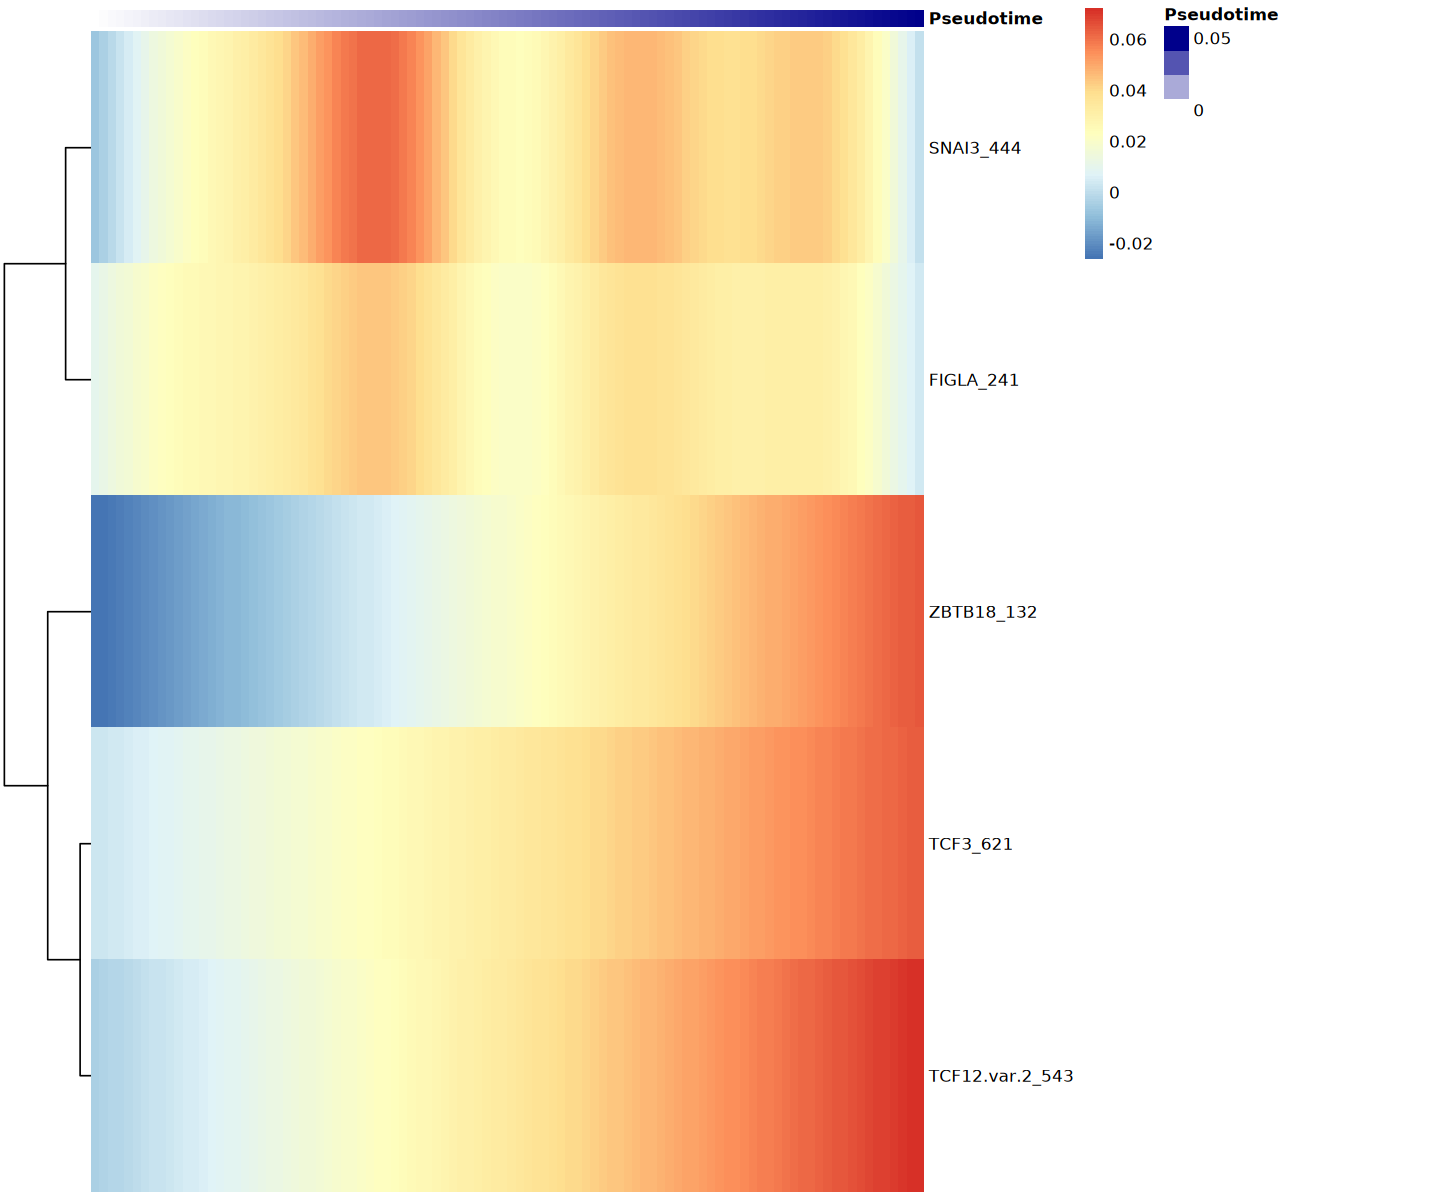

In [9]:
options(repr.plot.width=12, repr.plot.height=10)
test = copy(format_output)
test$gene_stats = format_output$gene_stats %>% filter(Gene %in% names(superior_list)[unlist(superior_list)])
plotHeatmapTopMotifs(overall_predictions, test, number_genes = 5, ranking_metric = "Range_of_Change")

# Per genes plot 

These subsections are made to be copy pasted

## HOXA1

In [5]:
motif_section = "HOXA5_501"

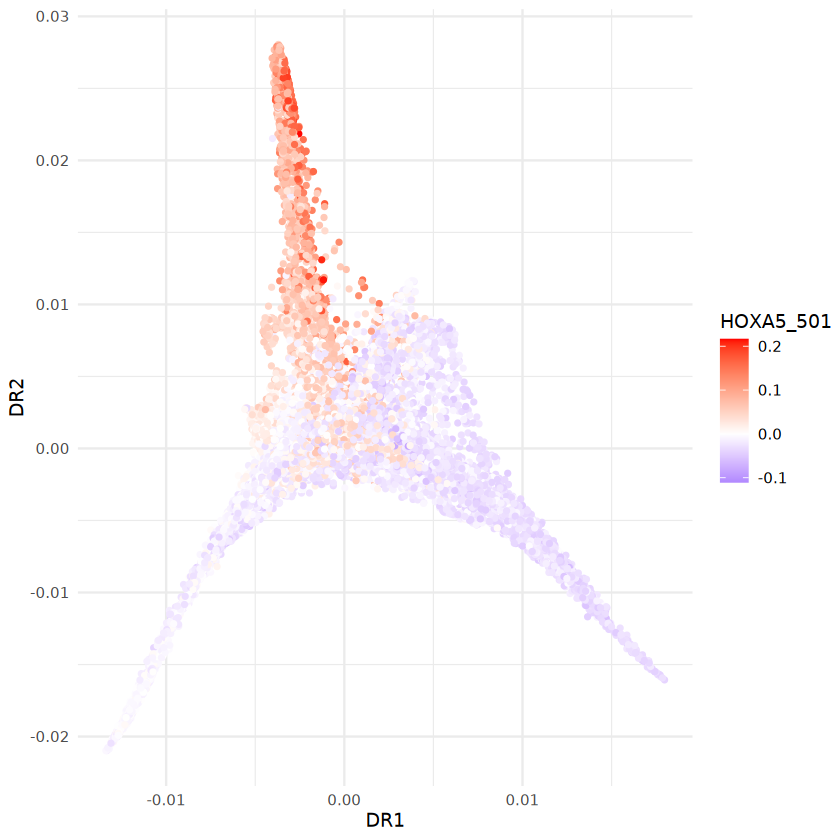

In [6]:
# plot on the reduced embedding
plotChromVARmotifEmbedding(sce, motif_section)

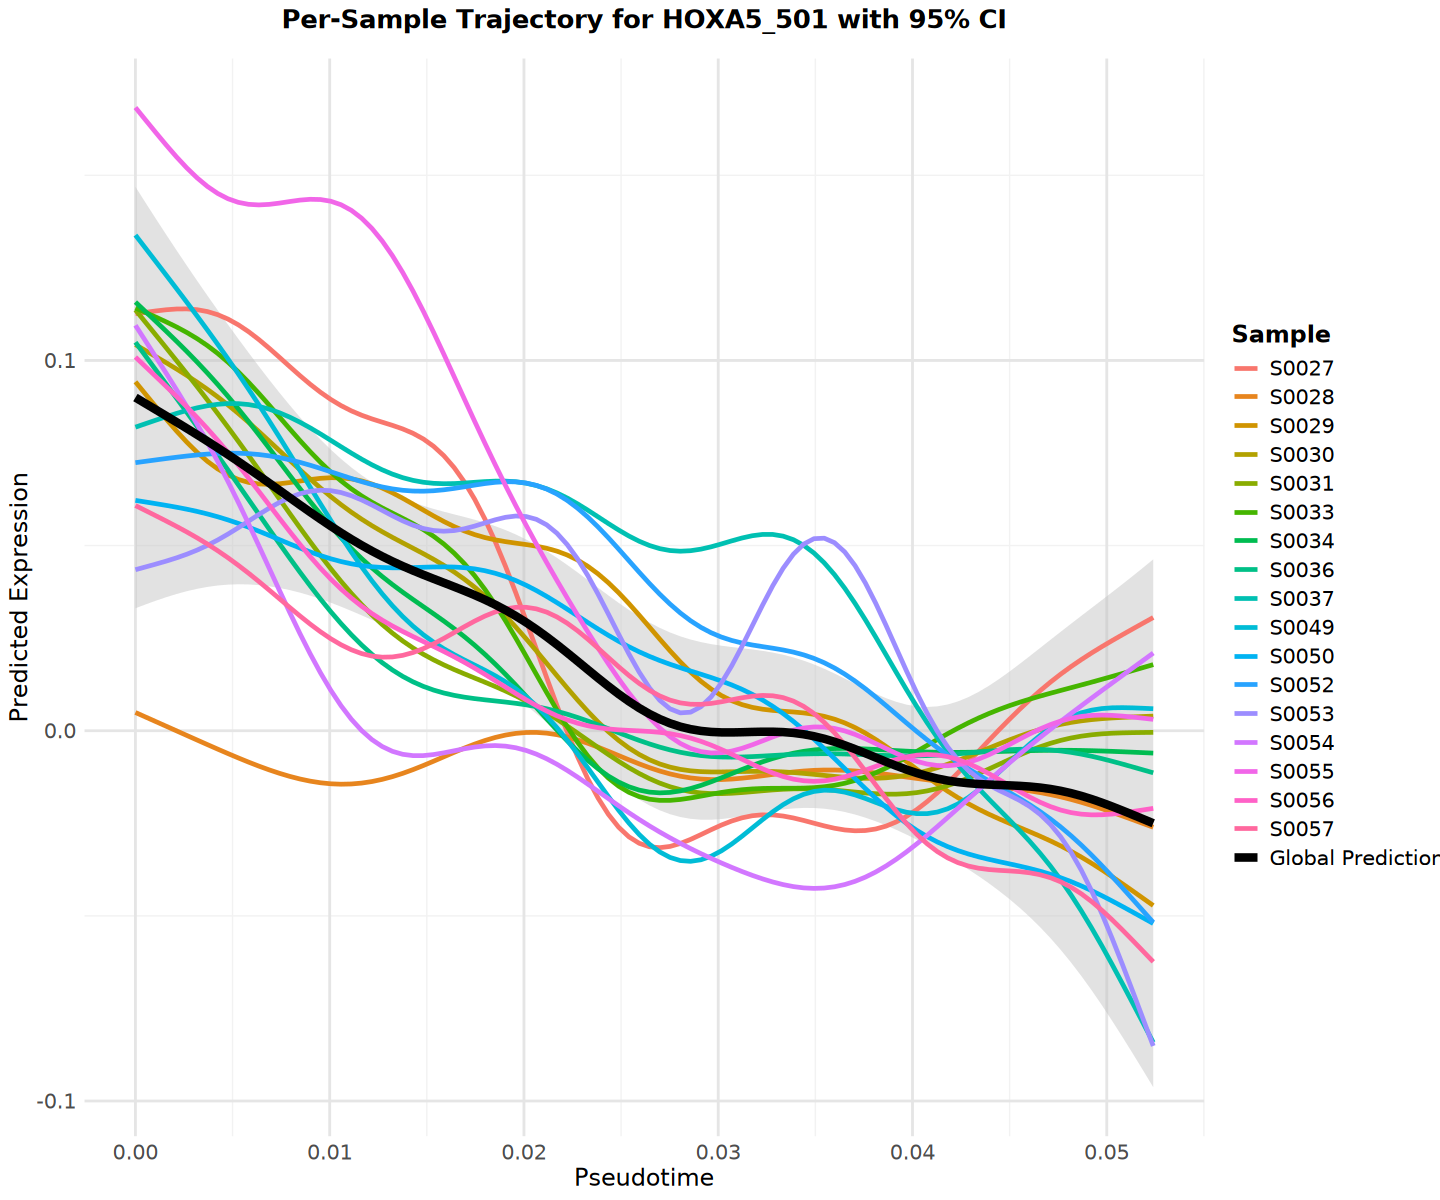

In [28]:
# look at sample variability
plotSampleTrajectoryMotif(motif_section, overall_predictions, sample_predictions)

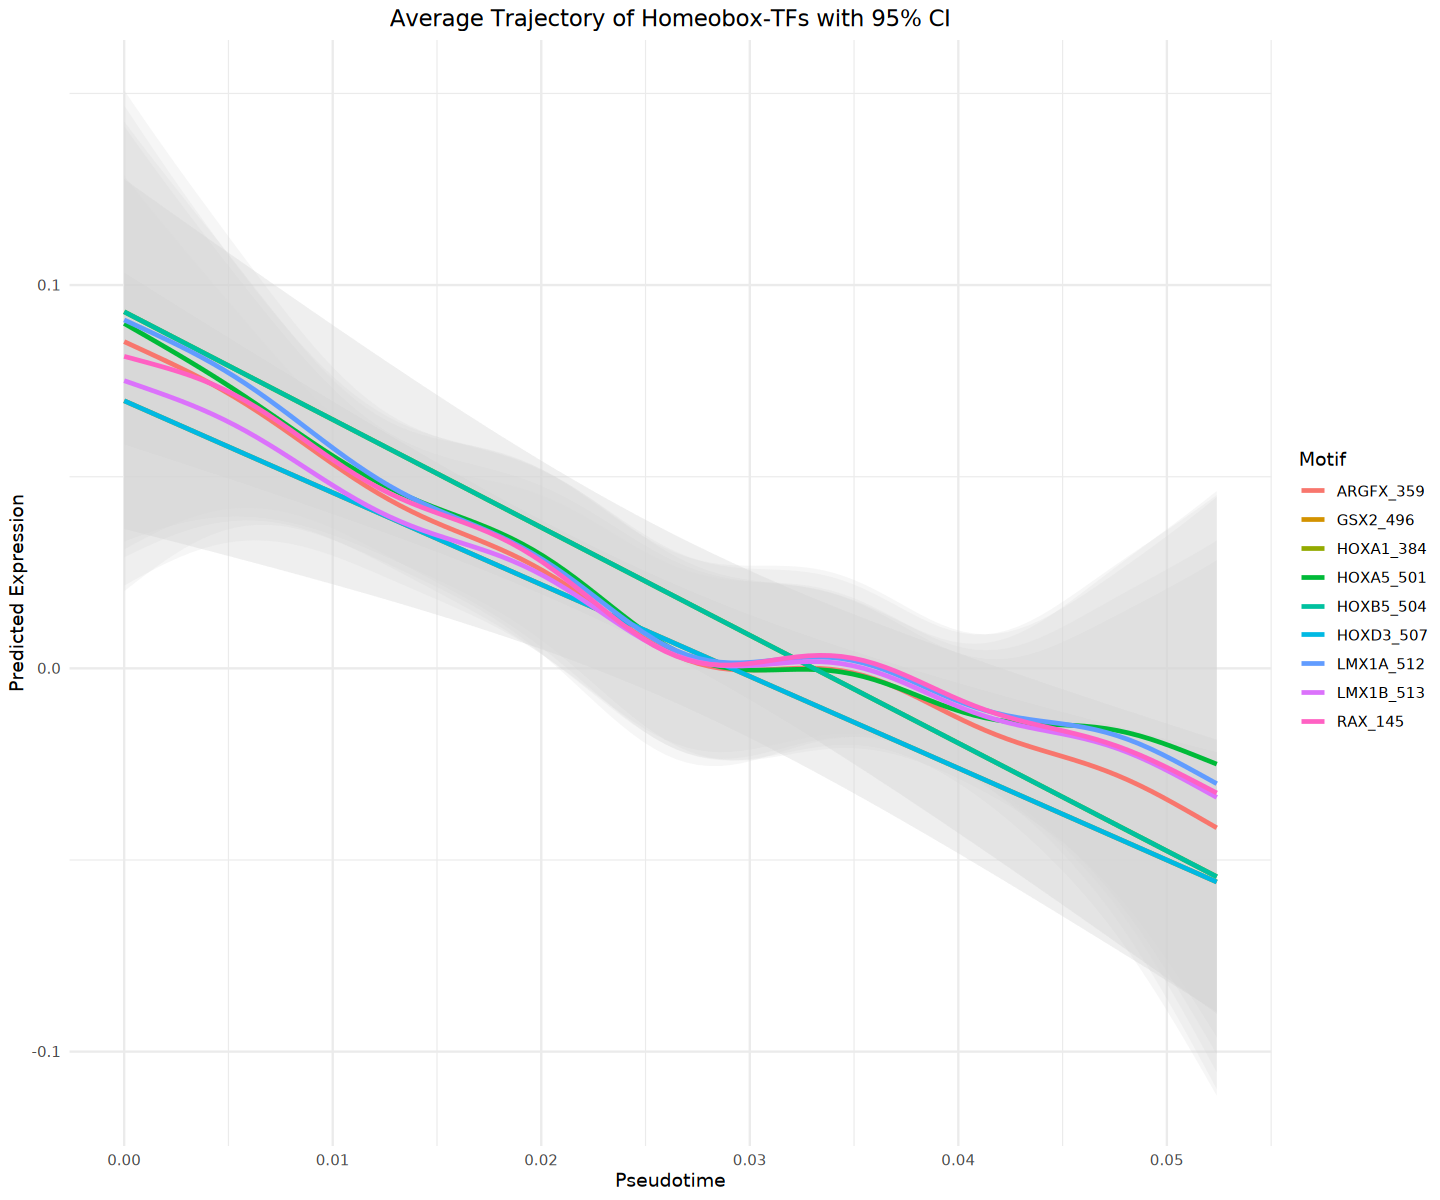

In [37]:
# plot with other motifs 
motifs_to_plot = c("RAX_145", "LMX1A_512", "LMX1B_513", "ARGFX_359", "HOXA1_384", "HOXA5_501", "HOXB5_504", "HOXD3_507", "GSX2_496")
plotMultipleGenesPseudotime(overall_predictions, motifs_to_plot, label = "Homeobox-TFs")

In [29]:
motif_section = "SMAD5_442"

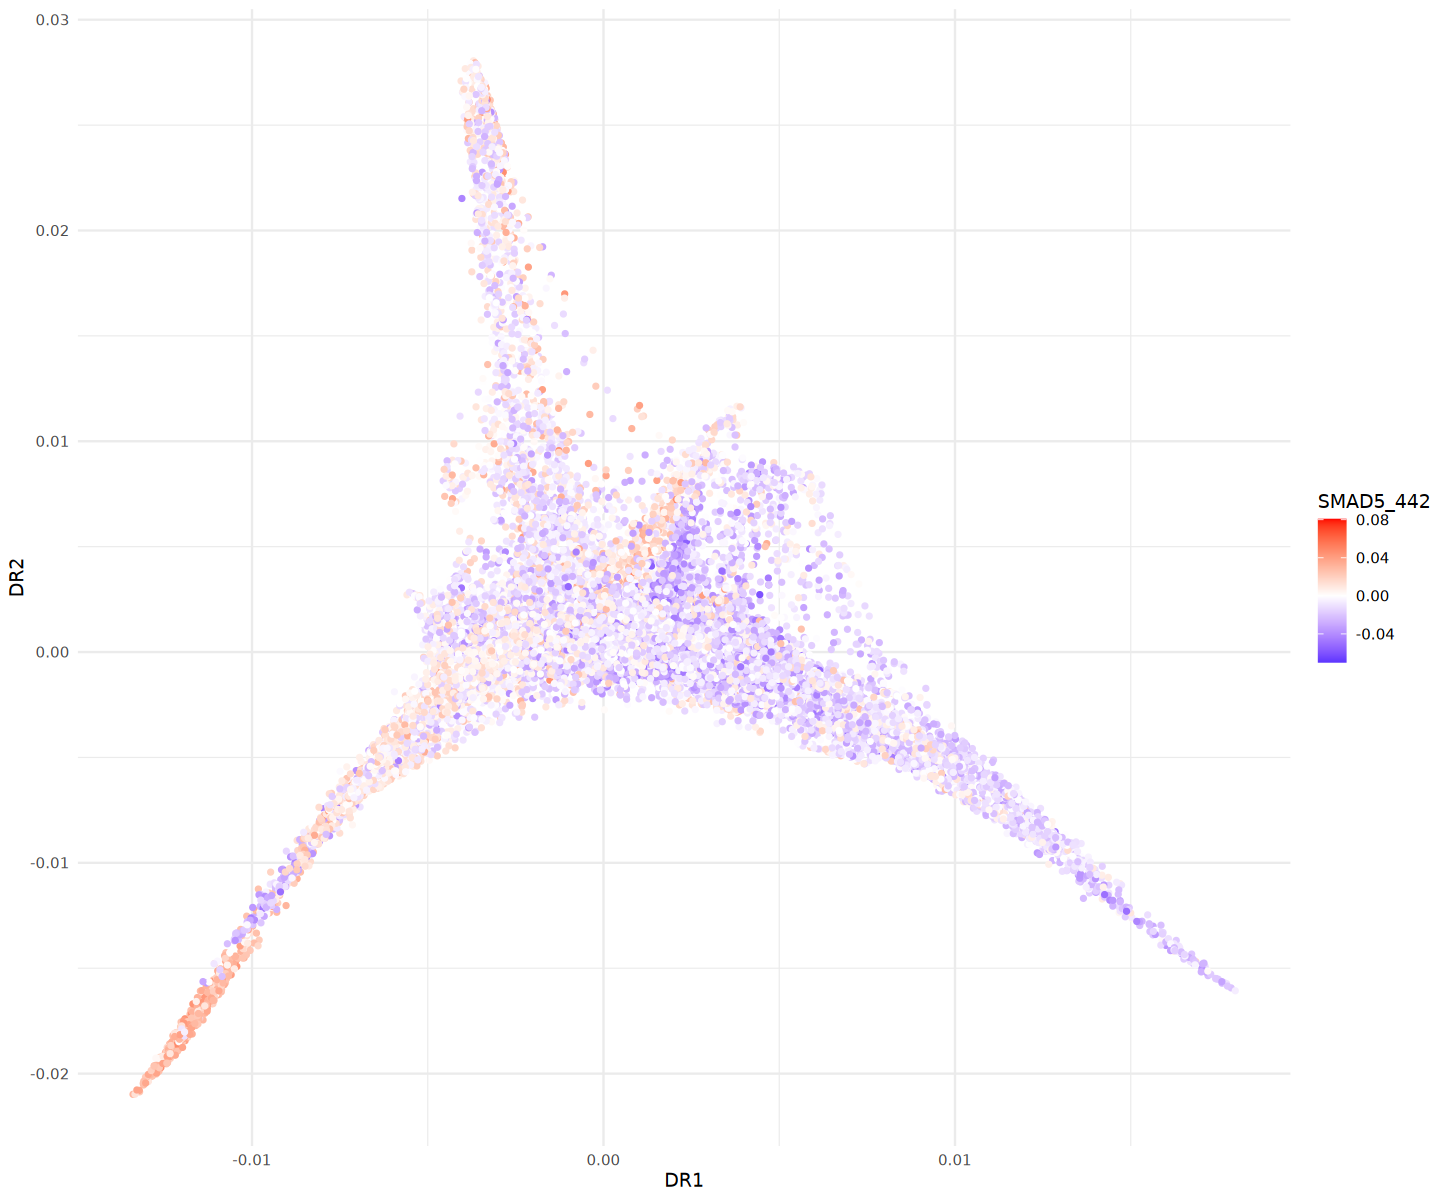

In [30]:
# plot on the reduced embedding
plotChromVARmotifEmbedding(sce, motif_section)

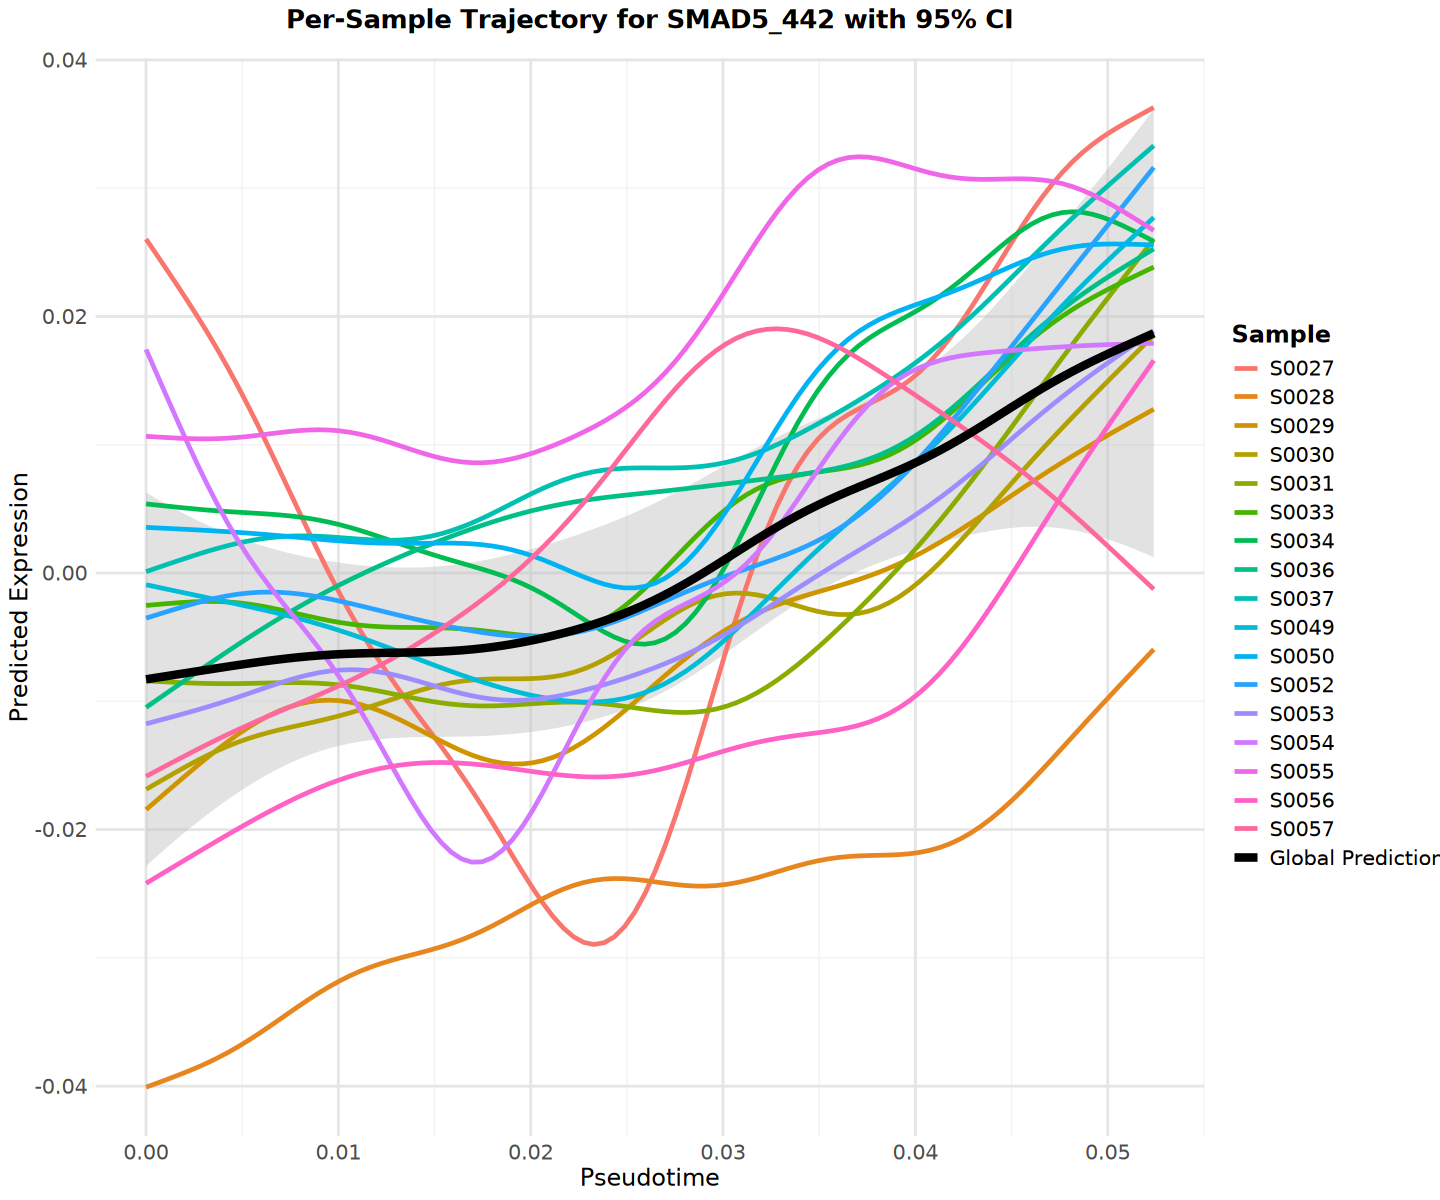

In [31]:
# look at sample variability
plotSampleTrajectoryMotif(motif_section, overall_predictions, sample_predictions)

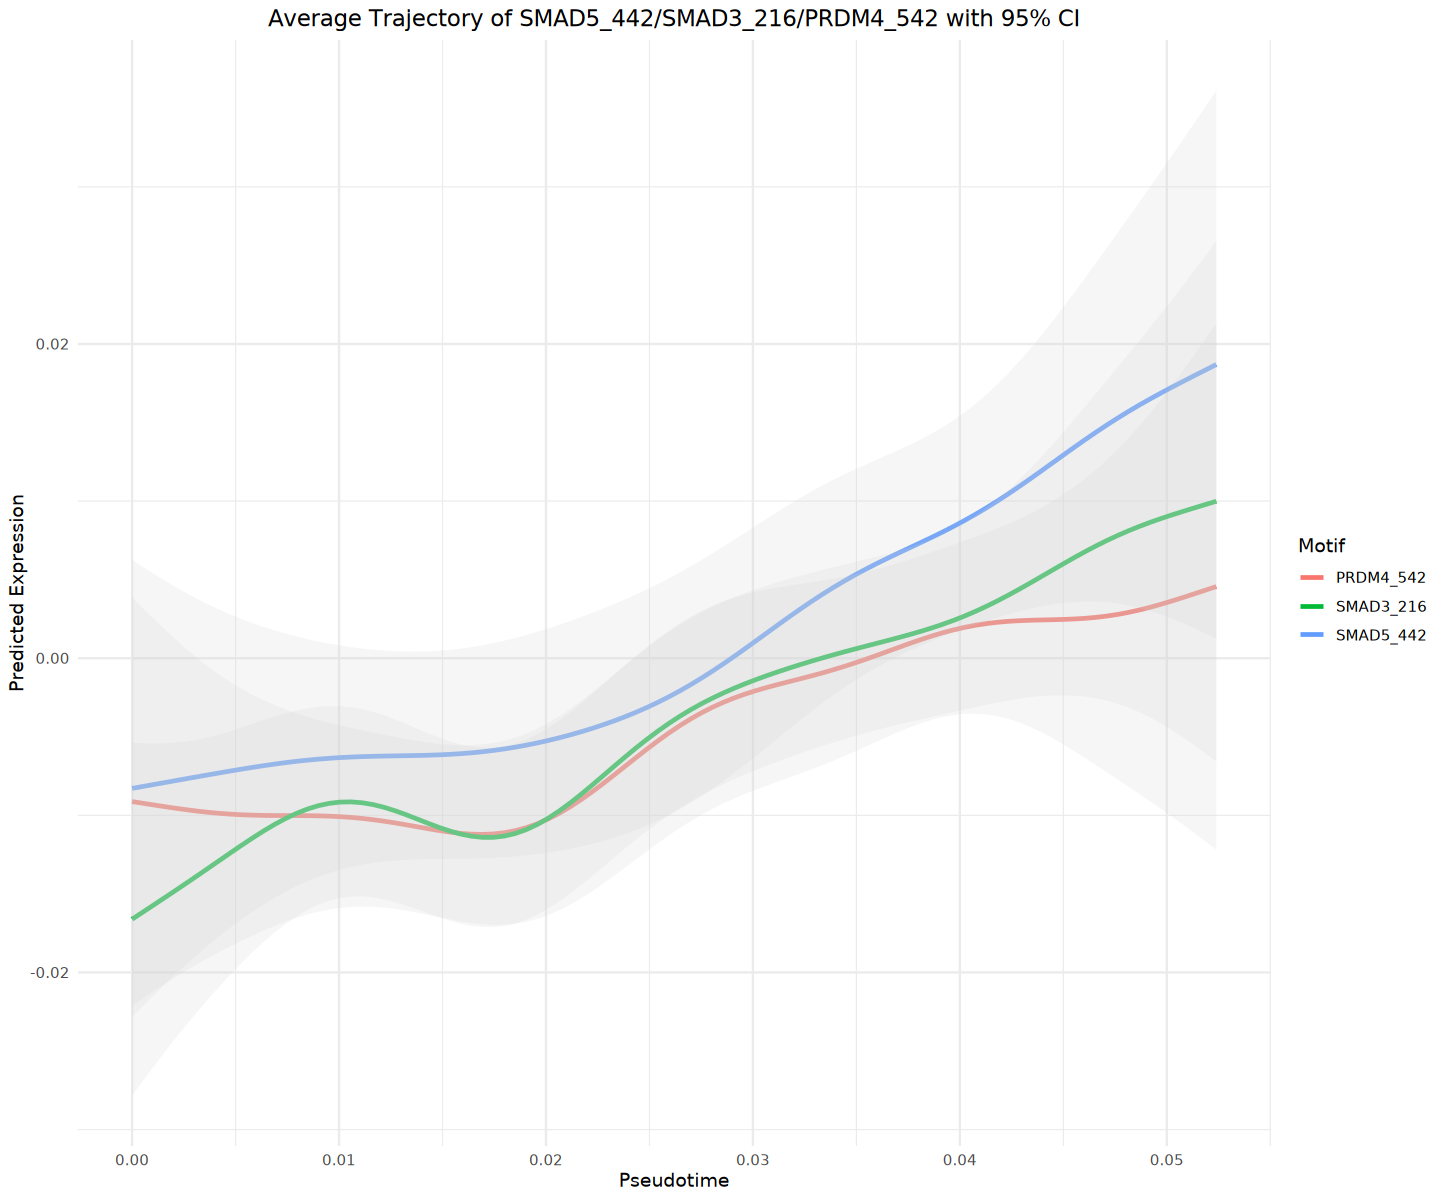

In [32]:
# plot with other motifs 
motifs_to_plot = c("SMAD5_442", "SMAD3_216", "PRDM4_542")
plotMultipleGenesPseudotime(overall_predictions, motifs_to_plot, label = NULL)

## FOS

In [15]:
motif_section = "FOSL1_571"

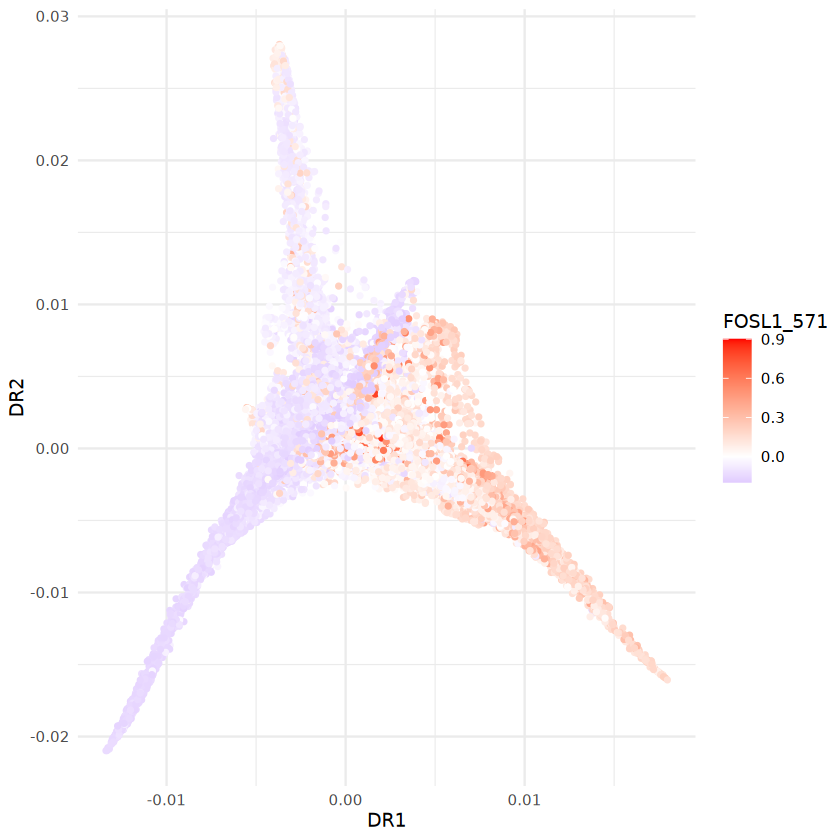

In [16]:
# plot on the reduced embedding
plotChromVARmotifEmbedding(sce, motif_section)

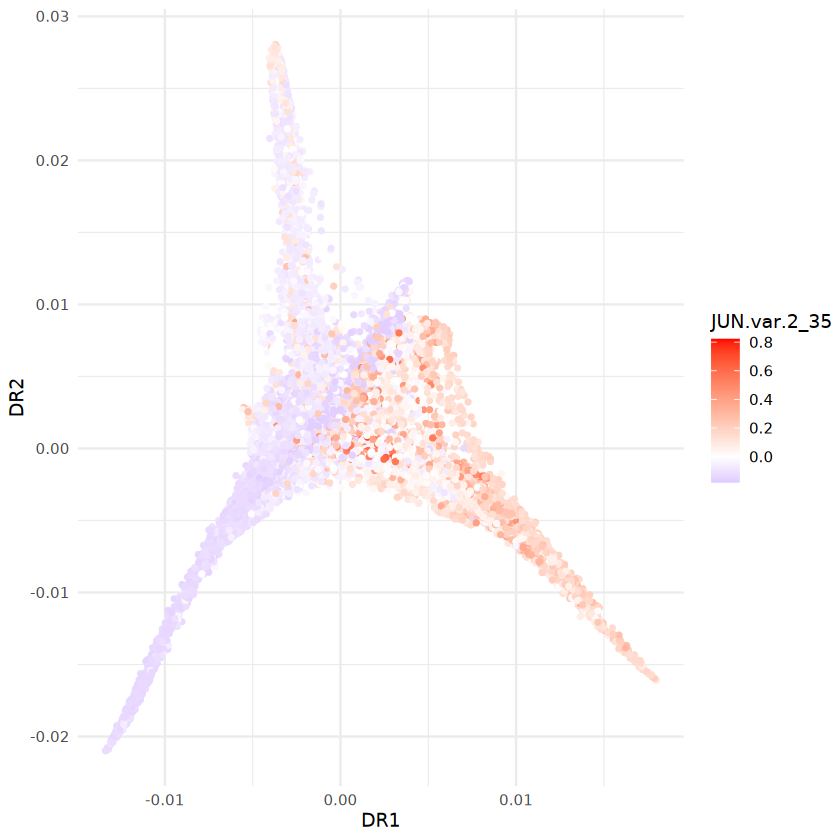

In [17]:
motif_section = "JUN.var.2_35"
plotChromVARmotifEmbedding(sce, motif_section)